#### ¡Hola! 👋  

Este es un proyecto especial, por primera vez escribire en español. Creo en que (equivocadamente) le di la espalda al español bajo una falsa premisa. Ahora se que puedo contribuir  al ecosistema hispano más de lo que podria en el anglosajon.

Empezare publicando un analisis donde detallare cada uno de mis pasos. Lo hare con datos que tome del canal [A2 Capacitación: Excel](https://www.youtube.com/channel/UCSW-_m4KXiok4Hq2nK97atw) y el cual les recomiendo seguir si quieren aprender Excel.

Dejando de lado lo anterior, hace tiempo escribi un articulo (esta incompleto) sobre [mi proceso para analizar datos](https://joseluistello.github.io/r/2021/07/12/data-analysis-process.html), la idea detras de este approach es abordar el analisis a traves de diferentes etapas. Estas etapas buscan estandarizar la manera en que analizo cualquier tipo de dato.

El outcome de mi proceso consiste en priorizar la legibilidad de mi analisis abordando cada etapa de forma separada (más no aislada).

Al final del día, lo que busco es entender la relacion entre mis variables y encontrar un path entre las observaciones dentro de mis datos. 


Empecemos por cargar nuestras librerias y datos <3

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    'data/Datos.csv',
    dtype={
        "Orden": int,
        "Medio" : str,
        "Vendedor" : str,
        "Plataforma" : str,
        "Tipo_Orden" : str,
        "Tipo_Cliente" : str,
        "Categoría" : str,
        "Producto" : str,
        "Precio" : int,
    },
)

La razón del porque esribi el upload del archivo de esta manera se debe a que es más facil editar el tipo de dato antes de, que despues de.

Este es un ejemplo de como tendriamos que modificar cada tipo de dato.

- df["Precio"] = pd.to_numeric(df["Precio"])



Ahora es tiempo de dos cosas:

1. Colocar un limite al maximo de filas que se muestran en cada return
2. Establecer un default para el tamaño de las graficas 

Les sugiero que utilicen este default. Es comodo establecer limites en el display de filas así como aumentar el tamaño de los plots.

In [3]:
pd.set_option("display.max_rows", 12)

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

### ¡Tiempo de entender nuestros datos! 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63221 entries, 0 to 63220
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Orden         63221 non-null  int32 
 1   Fecha         63221 non-null  object
 2   Medio         63221 non-null  object
 3   Vendedor      63221 non-null  object
 4   Plataforma    63221 non-null  object
 5   Comision      63221 non-null  object
 6   Tipo_Orden    63221 non-null  object
 7   Tipo_Cliente  63221 non-null  object
 8   Sexo          63221 non-null  object
 9   Categoría     63221 non-null  object
 10  Producto      63221 non-null  object
 11  Precio        63221 non-null  int32 
dtypes: int32(2), object(10)
memory usage: 5.3+ MB


🇫🇷  **Le Magnifique** 🇫🇷 

Tenemos variables interesantes pero primero debemos entender a que nos enfrentamos. El hecho de hacer preguntas como:
* ¿Son cualitativas o cuantitativas? 
* ¿Son continuas o categorias? 
Nos ayuda a tener una idea de como abordar un analisis. Empecemos por explicar la ciasificación de las variables.

- Los datos categoricos responden a preguntas como "qué", "quienes", o "donde", y se clasifican en tres grupos:
    - Datos nominales 
        - No tienen un orden (Paises)
    - Datos ordinales 
        - Tienen un orden (Grado de quemadura)
    - Datos binarios (dicotomicos) 
        - Solo tienen dos niveles (Genero)

- Los datos cuantitativos responden a preguntas como "cuántos", "cuánto" o con "qué" frecuencia, y se clasifican en dos grupos:
    - Datos discretos - No tienen decimales
        - Se pueden clasificar
        - Pueden ser ordinales (1ra, 2da, 3ra clase)
        - Pueden ser binarios (Vivo o muerto 1/0)
        - Pueden ser intervalios o ratios (Temperaturas)
    - Datos continuos - Tienen decimales
        - Lo mismo de arriba


Ahora que damos más claro esta parte, es hora de clasificar nuestro dataset.

In [5]:
df.head()

,Orden,Fecha,Medio,Vendedor,Plataforma,Comision,Tipo_Orden,Tipo_Cliente,Sexo,Categoría,Producto,Precio
0,1,06/08/2017,Propio,Directo en Tienda,Website,0%,Compra,Repetido,Hombre,Pantalones,Pants de Entrenamiento Reactivo,40
1,1,06/08/2017,Propio,Directo en Tienda,Website,0%,Compra,Repetido,Hombre,Sudaderas y chamarras,Sudadera sin Costuras,50
2,1,06/08/2017,Propio,Directo en Tienda,Website,0%,Compra,Repetido,Mujeres,Leggings,Leggings Ombre,36
3,1,06/08/2017,Propio,Directo en Tienda,Website,0%,Compra,Repetido,Mujeres,Bra deportivo,Bra Vital sin costuras,40
4,1,06/08/2017,Propio,Directo en Tienda,Website,0%,Compra,Repetido,Hombre,Camisetas,Camiseta Heather,50


- Datos Categoricos
     - Medio
     - Vendedor
     - Plataforma
     - Tipo_Orden
     - Tipo_Cliente
     - Sexo
     - Categoia
     - Producto
- Datos Continuos
     - Fecha
     - Comision
     - Precio
     
¿En que tipo de subgrupo crees que entren? Te lo dejo de tarea 😂 

Una de las cosas que me gusta hacer antes de buscar patrones es aislar variables. 
Este aislamiento me permite generar pistas acerca del dataset. Puedo ver el peso de cada variable, su distribución, sus rangos, las desviaciones que tiene, etc.  

In [6]:
(
df["Sexo"]
    .value_counts()
)

Mujeres    35937
Hombre     27284
Name: Sexo, dtype: int64

In [7]:
(
df["Sexo"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str) + '%'
)

Mujeres    56.8%
Hombre     43.2%
Name: Sexo, dtype: object

Ahora se que existe una mayoría de mujeres dentro de mi set, lo cual me da señales que planeo ir guardando. Pensemoslo de esta manera:
Ir directo a enteder la relacion entre plataformas/ventas/sexo puede salir mal, existe la posibilidad de sesgar mis pensamientos en torno a un resultado. 
Puedo concluir en que se debe invertir dinero en tal plataforma porque esto atraera 'X' clientes hombres. Cuando tal vez, existan mejores lugares para poner el dinero. 

Por cierto, escribo el codigo en vertical debido a que quiero hacer legible mi analisis para su reproducción, al mismo tiempo que emulo los pipelines de R.

Bueno, sigamos marchando!

In [8]:
(
df["Plataforma"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str)+ '%'
)

Instagram    53.6%
Youtube      17.5%
Facebook     15.4%
Website      13.5%
Name: Plataforma, dtype: object

Lo que nos arroja este resultado es el total de observaciones que presento cada plataforma. Esto quiere decir (hasta ahora) que Instagram es la que más unidades vende, pero eso no significa que sea la que más revenue genere.

In [70]:
(
df["Vendedor"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str)+ '%'
)

Publicidad Insta      20.0%
Directo en Tienda     13.5%
Publicidad Face        9.4%
Publicidad Youtube     7.9%
karlagvzcia            4.5%
                      ...  
geogluisovec           0.5%
gypseajain             0.5%
nicole.izuristilo      0.5%
anacsimdao             0.3%
andreaheraz            0.3%
Name: Vendedor, Length: 44, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

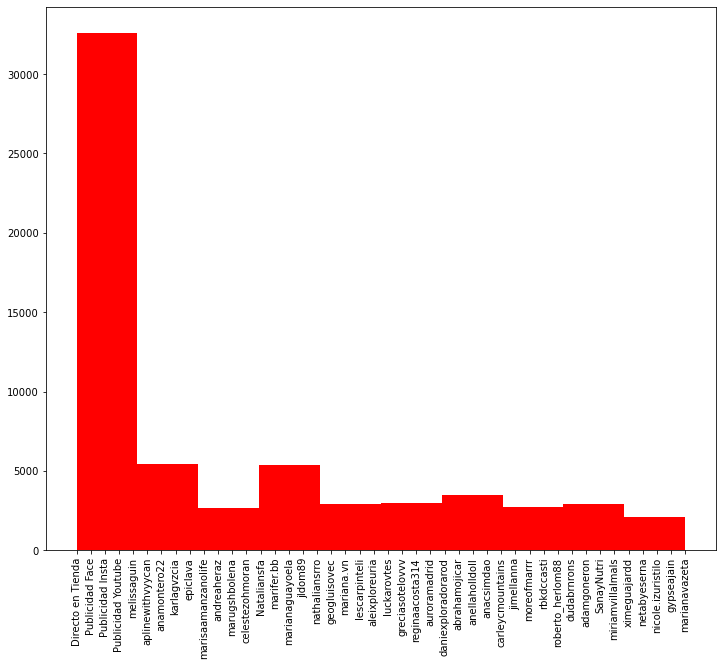

In [71]:
df["Vendedor"].hist(bins=10, color='r')
plt.xticks(rotation='vertical')
plt.grid(False)
plt.show

In [11]:
(
df["Tipo_Cliente"]
    .value_counts()
)

Repetido    32561
Nuevo       30660
Name: Tipo_Cliente, dtype: int64

In [12]:
(
df["Tipo_Orden"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str)+ '%'
)

Compra        91.0%
Devolucion     9.0%
Name: Tipo_Orden, dtype: object

In [13]:
(
df["Comision"]
    .value_counts()
)

0%     32150
30%    12807
20%     6702
10%     5872
40%     5690
Name: Comision, dtype: int64

In [14]:
(
df["Medio"]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .astype(str)+ '%'
)

Propio        50.9%
Influencer    49.1%
Name: Medio, dtype: object

In [15]:
( 
df["Precio"]
    .describe()
    .round(1)
)

count    63221.0
mean        40.7
std         13.6
min         10.0
25%         34.0
50%         40.0
75%         50.0
max        100.0
Name: Precio, dtype: float64

Text(0, 0.5, 'Volumen de productos')

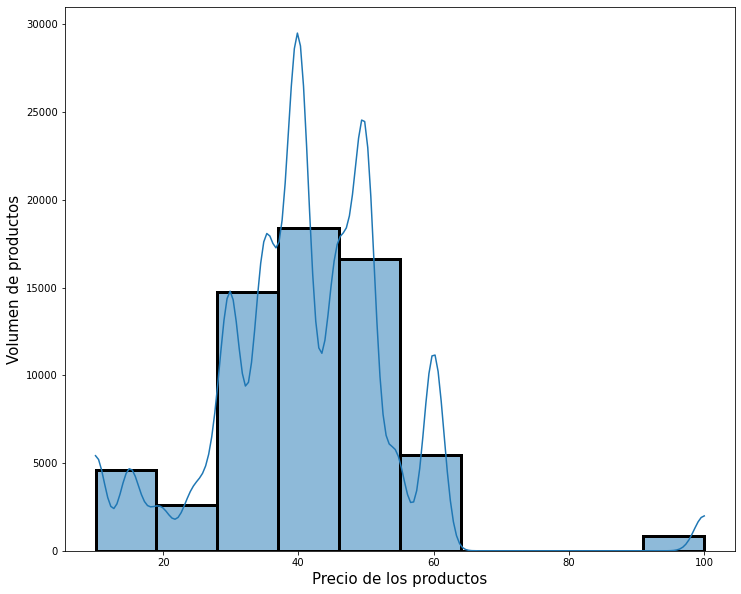

In [46]:
PrecioDist = sns.histplot(
    df, 
    x="Precio",
    bins=10,
    linewidth=3, 
    kde = True)
PrecioDist.set_xlabel("Precio de los productos", fontsize = 15)
PrecioDist.set_ylabel("Volumen de productos", fontsize = 15)

Bueno, ya se puso interesante la cosa. Hasta ahora hemos aprendido:
1. El volumen de ventas es dominado por Instagram, lejos de Youtube, Facebook y el Website
2. Las mujeres representan el 56.8% de las observaciones mientras que los hombres tienen el 43.2%
3. El 55.3% de las ventas se concentra en 5 vendedores y el 42.9% en 3
4. Hay 44 vendedores "afiliados" a la compañia, me parecen muchos. Me causa algo de ruido.
5. Tienen "buena" retencion y lo coloco entre comillas ya que bien puede desplozarme despues de que un repetido compro, o sea que no hubo una tercera vez.
6. Hubo pocas devoluciones comparado a sus compras, 9% comparado con un 91%
7. Existen 5 tipos de comisiones donde la mayoria se concentra entre el 0% y 30%
8. El precio de los productos tiene un de 10 pesos y un maximo 100 pesos donde la mayoria de los productos se concentra entre los 20 y 50 pesos


##### Es tiempo de entender las relaciones entre nuestas variables. 

El aislamiento ya dio muchas pistas así que es tiempo de parar. He llegado al punto donde es necesario contar con un plan de ataque pues de lo contrario terminare perdiendome. Tengo muchas preguntas, desde saber donde se concentran las comisiones y porque, hasta entender de donde viene realmente el crecimiento.

Pensemoslo un poco, si las comisiones del 40% se concentran en un rango de precio elevado (100) , tendriamos un dropeo del revenue del 40 pesos. A los 60 pesos restantes todavía tenemos que agregarle mas costos fijos y variables. 
La empresa puede estar perdiendo dinero sin siquiera notarlo. 

Se que estoy limitado por paradigmas, esquemas y modelos pero en otro contexto esto podría ser cierto. Mucho ojo.

Si no fui muy claro, dejame que te lo explique de esta manera. En este punto debemos comenzar a preguntarnos que es lo que queremos lograr y como una variable depende o se relaciona con la otra, y el como podemos sacar el maximo provecho de eso.

**(Inserta imagen creada en Lunacy)[]**

Mmmmm, voy a utilizar un approach top-down. Esto significa que ire desde arriba hacía abajo explorando cada relacion que este en mi cabeza. Empezar desde arriba

**(Inserta imagen creada en Lunacy)[]**

Listo pues, ahora que todo quedo claro es tiempo de comenzar.

In [79]:
(
df
 .groupby('Sexo')['Precio']
 .sum().reset_index()
 .sort_values('Precio', ascending=False)
)

,Sexo,Precio
1,Mujeres,1380627
0,Hombre,1191223


In [146]:
(
df
 .groupby(['Plataforma', 'Sexo'])
 ['Precio']
 .sum()
 .reset_index()
 .sort_values('Sexo', ascending=False)
)

,Plataforma,Sexo,Precio
1,Facebook,Mujeres,213132
3,Instagram,Mujeres,741824
5,Website,Mujeres,188001
7,Youtube,Mujeres,237670
0,Facebook,Hombre,182941
2,Instagram,Hombre,637018
4,Website,Hombre,159314
6,Youtube,Hombre,211950


Text(0, 0.5, 'Numero de unidades vendidas')

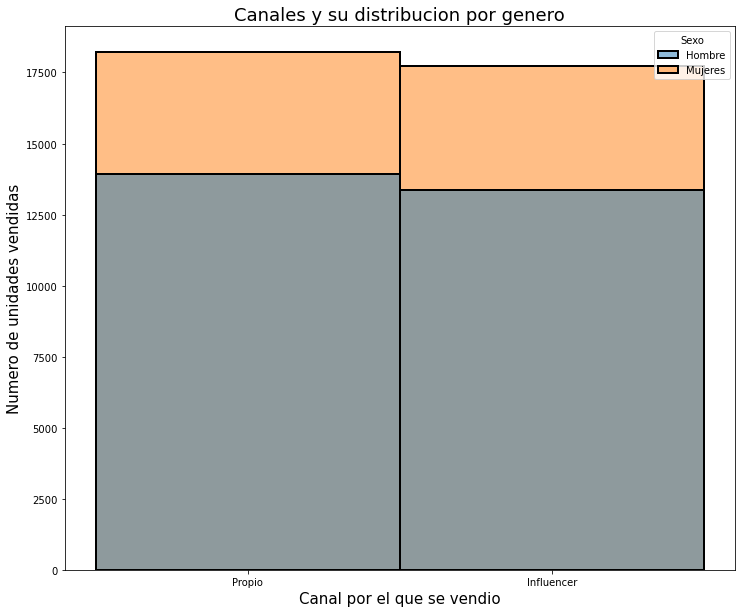

In [17]:
bx = sns.histplot(df,
                  x="Medio",
                  hue='Sexo',
                  linewidth=2)
bx.set_title("Canales y su distribucion por genero", fontsize=18)
bx.set_xlabel("Canal por el que se vendio", fontsize = 15)
bx.set_ylabel("Numero de unidades vendidas", fontsize = 15)

Text(0, 0.5, 'Numero de ventas')

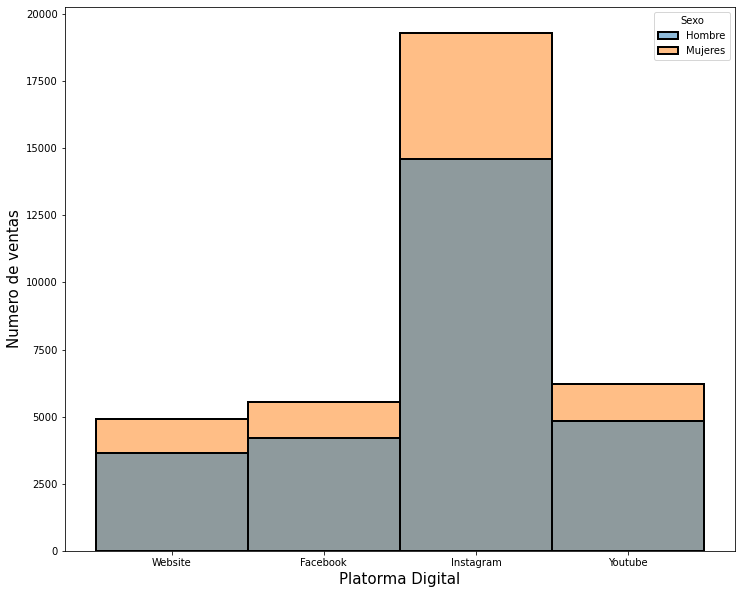

In [18]:
d = sns.histplot(
    df, 
    x="Plataforma",
    hue="Sexo",
    linewidth=2)
d.set_xlabel("Platorma Digital", fontsize = 15)
d.set_ylabel("Numero de ventas", fontsize = 15)

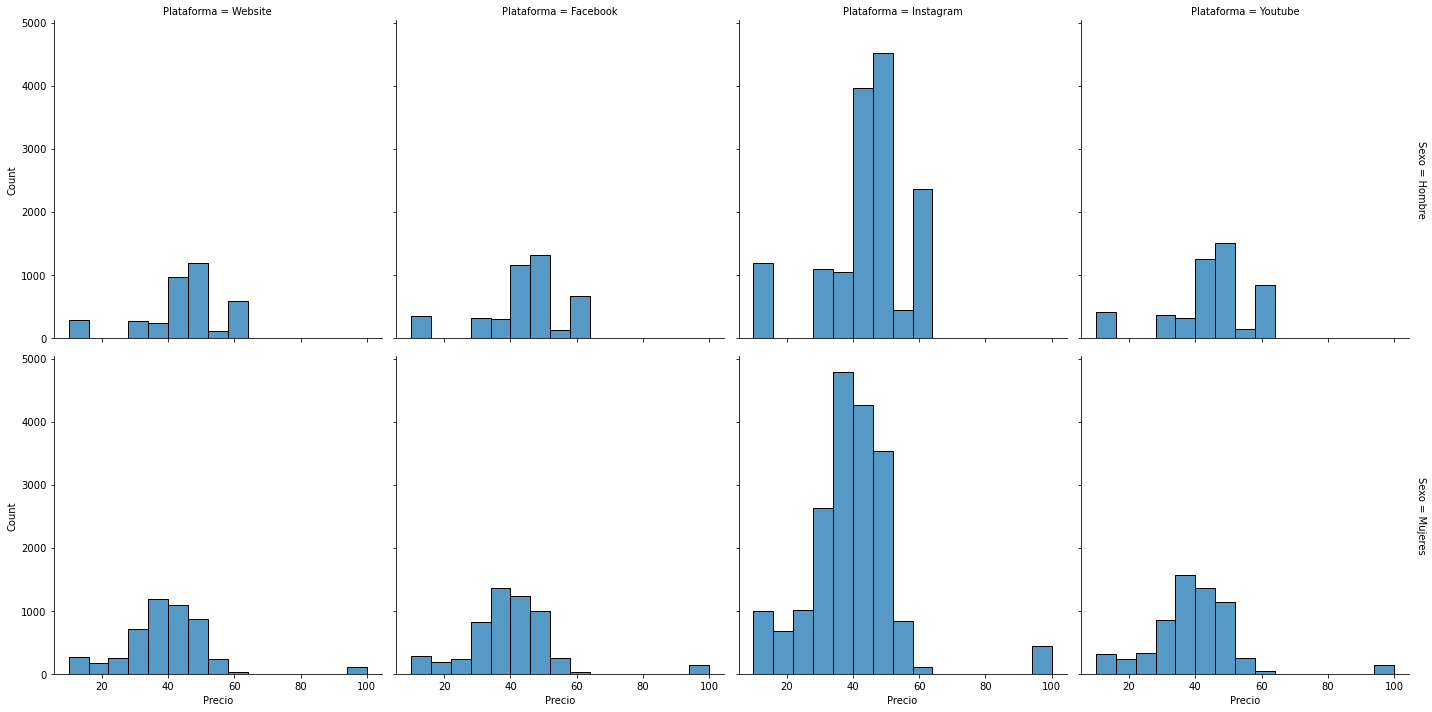

In [151]:
sns.displot(df, 
            x="Precio", 
            col="Plataforma", 
            row="Sexo", 
            binwidth=6, 
            height=5, 
            facet_kws=dict(margin_titles=True))

Ya estamos obteniendo insights.

1. Hay casi 7,000 mujeres mas que hombres dentro de la plataforma.
2. Se vende un poco más por canales propios y los generos siguen esa tendencia. 
3. Las plataformas que más predomina es Instagram, seguido de Youtube, Facebook y el Website del comercio.
4. Las mujeres se mantienen a la cabeza dentro de los 4 canales. 
5. En el ultimo histograma podemos observar distintas cosas.
    - 4.1 Las mujeres compran más articulos que los hombres dentro de cualquier plataforma
    - 4.2 Las mujeres compran articulos del maximo rango en cualquier plataforma.
    - 4.3 La plataforma que más productos de alto valor vende es Instagram.

Podemos englobar el conocimiento que tenemos sobre el data set hasta ahora:
1. Sabemos como se distribuye el precio de los productos y donde se concentra la mayor parte de los productos
2. Sabemos la disparidad del genero
3. Sabemos que canal y plataformas son las que mas venden productos
4. Donde se compran los articulos de alto valor y que genero los compra


#### Es tiempo de seguir avanzando en nuestro analisis

In [22]:
df.groupby('Sexo')['Precio'].sum().reset_index().sort_values('Precio', ascending=False)

,Sexo,Precio
1,Mujeres,1380627
0,Hombre,1191223


In [23]:
df.groupby(['Sexo', 'Plataforma'])['Precio'].sum().reset_index().sort_values('Precio', ascending=False)

,Sexo,Plataforma,Precio
5,Mujeres,Instagram,741824
1,Hombre,Instagram,637018
7,Mujeres,Youtube,237670
4,Mujeres,Facebook,213132
3,Hombre,Youtube,211950
6,Mujeres,Website,188001
0,Hombre,Facebook,182941
2,Hombre,Website,159314


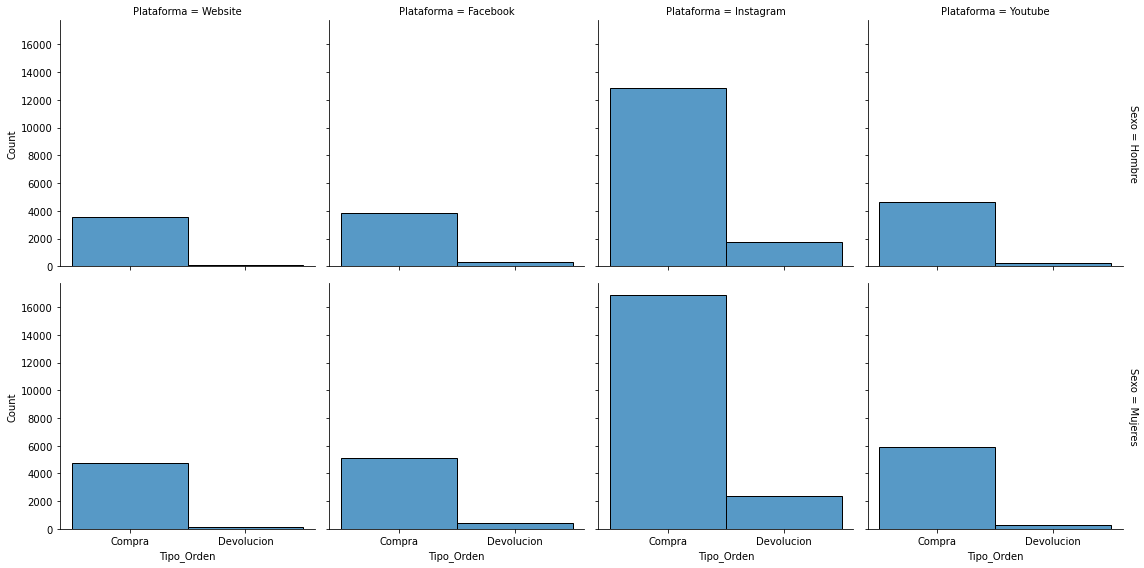

In [25]:
sns.displot(df, 
            x="Tipo_Orden", 
            col="Plataforma", 
            row="Sexo", 
            binwidth=3, 
            height=4, 
            facet_kws=dict(margin_titles=True))